# Comparing LOCO data with CMEMS data

In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
import gsw
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean.cm as cmo
import datetime
from datetime import timedelta
from scipy import interpolate
import seaborn as sns
sns.set_style('dark')
from info import datadir, figdir

In [2]:
data = sio.loadmat(datadir+'LOCO_CMEMS_val.mat')

time = data['time'][0]
t0 = datetime.datetime(1950,1,1,0,0) # origin of time = 1 January 1950, 00:00:00 UTC
dates = np.array([t0 + datetime.timedelta(hours=i) for i in time])
depth_cmems = data['depth_cmems'][0]
depth_loco = data['depth_loco'][0]
Time_cmems = data['Time_cmems']
Time_loco = data['Time_loco']
Depth_cmems = data['Depth_cmems']
Depth_loco = data['Depth_loco']

SA_cmems = data['SA_cmems']
SA_loco = data['SA_loco']
CT_cmems = data['CT_cmems']
CT_loco = data['CT_loco']
sigma0_cmems = data['sigma0_cmems']
sigma0_loco = data['sigma0_loco']
mld_cmems = data['mld_cmems'][0]
mld_loco = data['mld_loco'][0]

In [3]:
def plotTimeDepth(ax,Time,Vert,data,levels,cmap,verttype,minv,maxv,label,title,inv_cbar=False):
    plot = ax.contourf(Time,Vert,data,levels=levels,extend='both',cmap=cmap)
    cbar = plt.colorbar(plot, ax=ax)
    if verttype=='depth':
        ax.set_ylabel('Depth (m)', fontsize=15)
    else:
        ax.set_ylabel('Pressure (dbar)', fontsize=15)
    ax.set_ylim(minv,maxv)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xticks(time[0::12])
    ax.set_xticklabels([dates[i].year for i in np.arange(0,len(time[0::12])*12,12)])
    ax.set_xlim(time[8],time[150])
    ax.set_yticks([100,500,1000,1500,2000])
    ax.set_title(title,fontsize=17)
    cbar.ax.set_ylabel(label,fontsize=14)
    cbar.ax.tick_params(axis='y', which='both', labelsize=14)
    cbar.ax.get_yaxis().labelpad = 25
    if inv_cbar:
        cbar.ax.invert_yaxis()

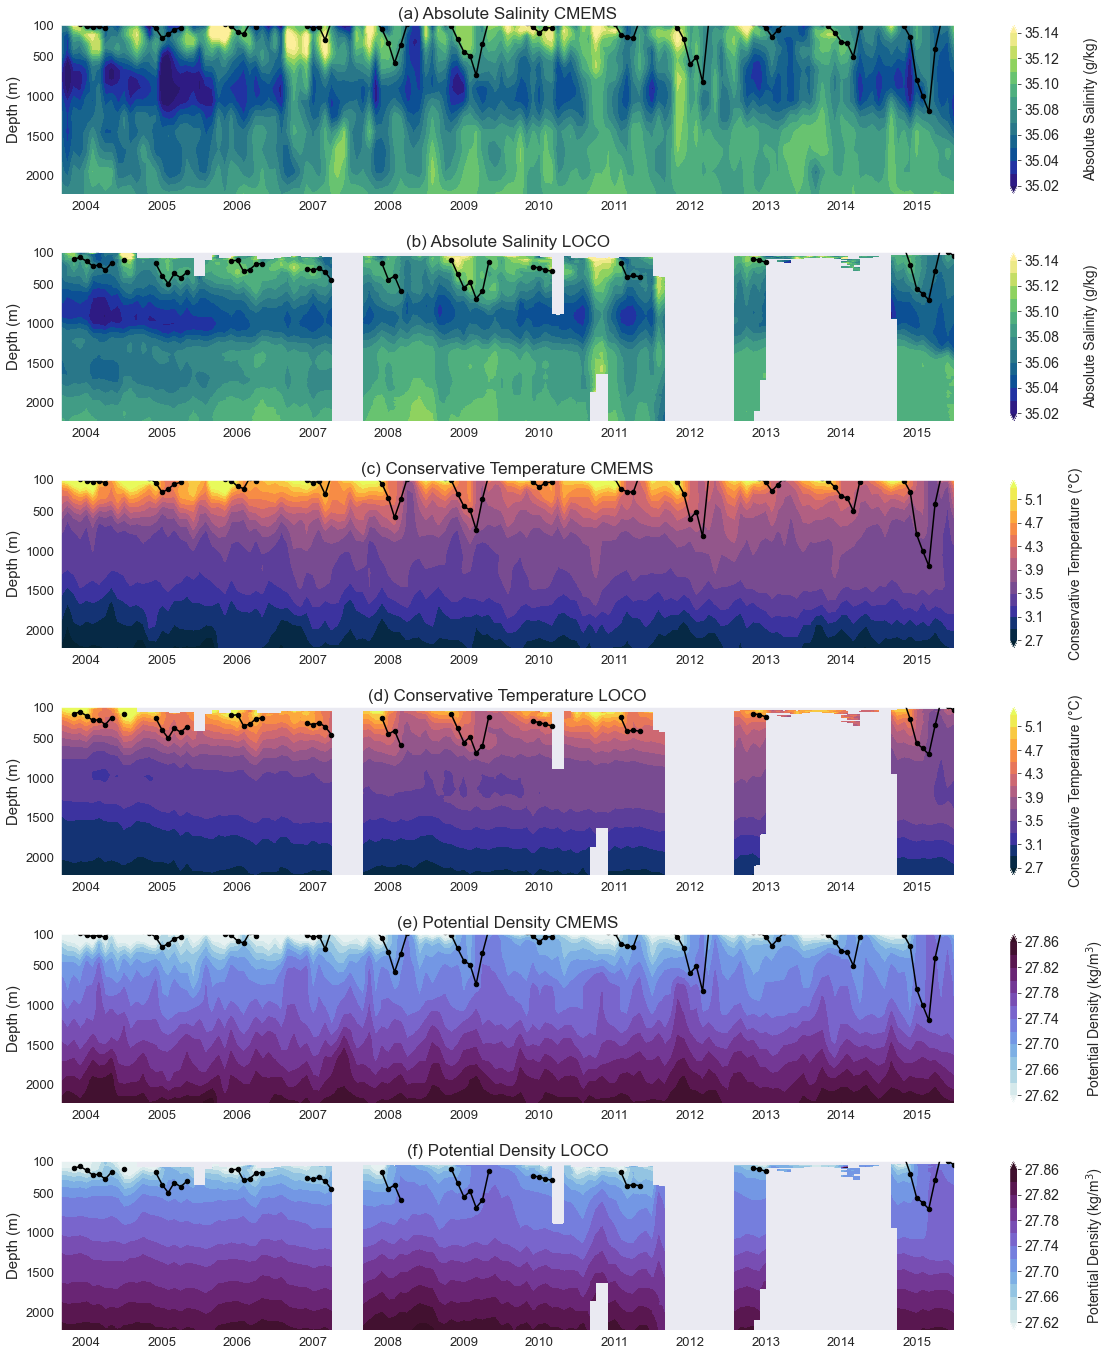

In [5]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(6,1,figsize=(20,24))

S_levels = np.arange(35.02,35.141,0.01)
T_levels = np.arange(2.7,5.41,0.2)
sigma0_levels = np.arange(27.62,27.87,0.02)

plotTimeDepth(ax1,Time_cmems,Depth_cmems,SA_cmems,S_levels,'cmo.haline','depth',100,np.max(depth_loco),
              'Absolute Salinity (g/kg)','(a) Absolute Salinity CMEMS')
ax1.scatter(time,mld_cmems,color='black',s=20)
ax1.plot(time,mld_cmems,color='black')
plotTimeDepth(ax2,Time_loco,Depth_loco,SA_loco,S_levels,'cmo.haline','depth',100,np.max(depth_loco),
              'Absolute Salinity (g/kg)','(b) Absolute Salinity LOCO')
ax2.scatter(time,mld_loco,color='black',s=20)
ax2.plot(time,mld_loco,color='black')

plotTimeDepth(ax3,Time_cmems,Depth_cmems,CT_cmems,T_levels,'cmo.thermal','depth',100,np.max(depth_loco),
              'Conservative Temperature ('+'\u00B0'+'C)','(c) Conservative Temperature CMEMS')
ax3.scatter(time,mld_cmems,color='black',s=20)
ax3.plot(time,mld_cmems,color='black')
plotTimeDepth(ax4,Time_loco,Depth_loco,CT_loco,T_levels,'cmo.thermal','depth',100,np.max(depth_loco),
              'Conservative Temperature ('+'\u00B0'+'C)','(d) Conservative Temperature LOCO')
ax4.scatter(time,mld_loco,color='black',s=20)
ax4.plot(time,mld_loco,color='black')

plotTimeDepth(ax5,Time_cmems,Depth_cmems,sigma0_cmems,sigma0_levels,'cmo.dense','depth',100,np.max(depth_loco),
              'Potential Density (kg/m$^3$)','(e) Potential Density CMEMS')
ax5.scatter(time,mld_cmems,color='black',s=20)
ax5.plot(time,mld_cmems,color='black')
plotTimeDepth(ax6,Time_loco,Depth_loco,sigma0_loco,sigma0_levels,'cmo.dense','depth',100,np.max(depth_loco),
              'Potential Density (kg/m$^3$)','(f) Potential Density LOCO')
ax6.scatter(time,mld_loco,color='black',s=20)
ax6.plot(time,mld_loco,color='black')

plt.subplots_adjust(hspace=0.35)
plt.savefig(figdir+'LOCO_CMEMS_val.png',bbox_inches='tight')
plt.show()